In [37]:
from openai import OpenAI
from src.ic_device_llm.configs.api_key_config import OPENAI_API_KEY
from src.ic_device_llm.configs.path_config import RESOURCES_DIR_PATH


In [5]:
train_data_file_path = RESOURCES_DIR_PATH / "openai_conversations.jsonl"

In [38]:
# 1.upload the training data to openai
client = OpenAI(api_key=OPENAI_API_KEY)
client.files.create(
  file=open(train_data_file_path, "rb"),
  purpose="fine-tune"
)

In [7]:
# 2.train
client.fine_tuning.jobs.create(
  training_file="file-W53kol9BsSxqdGFrVQc6RnT3",
  model="gpt-3.5-turbo"
)

FineTuningJob(id='ftjob-xTBRf5I9luxuxRoOxLXw2MDc', created_at=1721185432, error=Error(code=None, message=None, param=None), fine_tuned_model=None, finished_at=None, hyperparameters=Hyperparameters(n_epochs='auto', batch_size='auto', learning_rate_multiplier='auto'), model='gpt-3.5-turbo-0125', object='fine_tuning.job', organization_id='org-k2NENndpQVAJpdqZKzrXCcip', result_files=[], seed=733867110, status='validating_files', trained_tokens=None, training_file='file-W53kol9BsSxqdGFrVQc6RnT3', validation_file=None, estimated_finish=None, integrations=[], user_provided_suffix=None)

In [41]:
# 3. check events and the status of the training
from loguru import logger
# List up to 10 events from a fine-tuning job
train_job_id = "ftjob-xTBRf5I9luxuxRoOxLXw2MDc"
events = client.fine_tuning.jobs.list_events(fine_tuning_job_id=train_job_id, limit=2000)
# logger.info(f"Events: {events}")






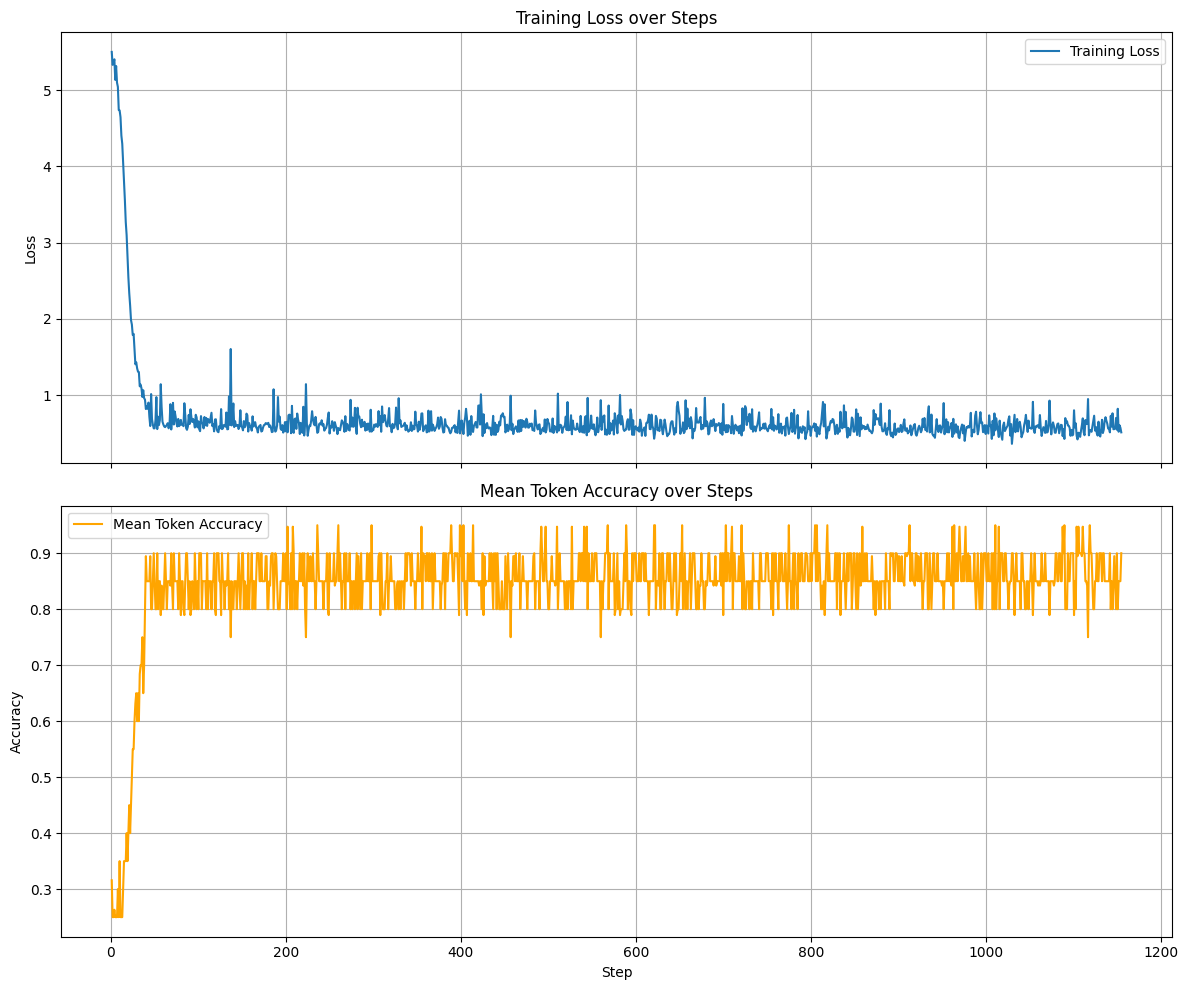

In [42]:
import matplotlib.pyplot as plt
from collections import defaultdict

def process_events(events):
    step_data = defaultdict(dict)
    for event in events.data:
        if event.type == 'metrics':
            step = event.data['step']
            step_data[step]['loss'] = event.data['train_loss']
            step_data[step]['accuracy'] = event.data['train_mean_token_accuracy']
    return step_data

def plot_training_progress(step_data):
    steps = sorted(step_data.keys())
    losses = [step_data[step]['loss'] for step in steps]
    accuracies = [step_data[step]['accuracy'] for step in steps]

    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

    # 绘制损失曲线
    ax1.plot(steps, losses, label='Training Loss')
    ax1.set_ylabel('Loss')
    ax1.set_title('Training Loss over Steps')
    ax1.legend()
    ax1.grid(True)

    # 绘制准确率曲线
    ax2.plot(steps, accuracies, label='Mean Token Accuracy', color='orange')
    ax2.set_xlabel('Step')
    ax2.set_ylabel('Accuracy')
    ax2.set_title('Mean Token Accuracy over Steps')
    ax2.legend()
    ax2.grid(True)

    plt.tight_layout()
    plt.savefig('training_progress.png')
    plt.show()

# 假设 events 是从 API 调用获得的事件对象
# events = client.fine_tuning.jobs.list_events(fine_tuning_job_id=train_job_id, limit=100)

# 处理事件数据
step_data = process_events(events)

# 绘制训练进度图
plot_training_progress(step_data)


In [33]:

finetune_status = client.fine_tuning.jobs.retrieve(train_job_id)
logger.info(f"Status: {finetune_status}")


APIConnectionError: Connection error.

In [32]:

response = client.chat.completions.create(
  model="ft:gpt-3.5-turbo-0125:midsummer::9lpms7Qc",
  messages=[
    {"role": "system", "content": "You are a helpful assistant on GAA devices."},
    {"role": "user", "content": """"\
GAA device parameters:\n        - Gate length (lg_nw): 10.0 nm\n        - Nanowire radius (r_nw): 2.5 nm\n        - Oxide thickness (t_ox_nm): 1.0 nm\n        - Gate voltage (vg): 0.55 V\n        - Drain voltage (vd): 0.5 V\n    Infer the drain saturation current (ids) for this GAA device.\
"""},  ]
  
)
print(response.choices[0].message.content)

    The ids of this device is 1.8755e-05 A
    
